In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
xls_data=pd.read_excel("./table.xlsx")

In [3]:
t2_dat=xls_data.loc[:,"# of turns":"HFSS"]

In [4]:
t3_dat=xls_data.loc[:,"# of turns.1":"HFSS.1"]

In [5]:
t4_dat=xls_data.loc[:,"# of turns.2":"HFSS.2"]

In [6]:
t2_dat=t2_dat.replace(np.nan,0)
t3_dat=t3_dat.replace(np.nan,0)
t4_dat=t4_dat.replace(np.nan,0)

In [7]:
def data_restore(dat):
    for col_name in dat.columns[:5]:
        temp=0
        for i in range(len(dat[col_name])):
            if (dat.loc[i,col_name]!=0):
                temp=dat.loc[i,col_name]
            if (dat.loc[i,col_name]==0):
                dat.loc[i,col_name]=temp
    return dat

In [8]:
t2_dat=data_restore(t2_dat)
t3_dat=data_restore(t3_dat)
t4_dat=data_restore(t4_dat)

In [9]:
total_dat_temp=np.vstack([t2_dat.values,t3_dat.values,t4_dat.values])

In [10]:
del_index=np.where(total_dat_temp[:,6]==0)[0]

In [11]:
total_dat_temp=pd.DataFrame(total_dat_temp,columns=t2_dat.columns)

In [12]:
total_dat=total_dat_temp.drop(del_index)

In [13]:
total_dat.to_csv("preprocessed_data.csv",
                 columns=total_dat.columns,sep=",", index=False)

In [14]:
data=total_dat.values

In [15]:
log_dat_x=np.log(data[:,:6])

In [16]:
log_dat_y=np.log(data[:,6])

In [17]:
x_train=np.hstack([log_dat_x,data[:,:6]])

In [18]:
x_train=torch.FloatTensor(x_train)
y_train=torch.FloatTensor(log_dat_y)

In [19]:
model=nn.Linear(12,1)

In [20]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.0533,  0.0773,  0.1516,  0.1599,  0.1016,  0.0257, -0.0033,  0.2764,
          0.1251,  0.0117, -0.2855, -0.0831]], requires_grad=True), Parameter containing:
tensor([-0.1451], requires_grad=True)]


In [21]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [22]:
nb_epochs = 100000
for epoch in range(nb_epochs+1):

    prediction = torch.squeeze(model(x_train))
    cost = F.mse_loss(prediction, y_train) 
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/100000 Cost: 72.298775
Epoch  100/100000 Cost: 3.437135
Epoch  200/100000 Cost: 2.376051
Epoch  300/100000 Cost: 1.972212
Epoch  400/100000 Cost: 1.743078
Epoch  500/100000 Cost: 1.602422
Epoch  600/100000 Cost: 1.507568
Epoch  700/100000 Cost: 1.436995
Epoch  800/100000 Cost: 1.379828
Epoch  900/100000 Cost: 1.330533
Epoch 1000/100000 Cost: 1.286269
Epoch 1100/100000 Cost: 1.245552
Epoch 1200/100000 Cost: 1.207582
Epoch 1300/100000 Cost: 1.171908
Epoch 1400/100000 Cost: 1.138251
Epoch 1500/100000 Cost: 1.106433
Epoch 1600/100000 Cost: 1.076313
Epoch 1700/100000 Cost: 1.047785
Epoch 1800/100000 Cost: 1.020754
Epoch 1900/100000 Cost: 0.995136
Epoch 2000/100000 Cost: 0.970856
Epoch 2100/100000 Cost: 0.947840
Epoch 2200/100000 Cost: 0.926023
Epoch 2300/100000 Cost: 0.905340
Epoch 2400/100000 Cost: 0.885732
Epoch 2500/100000 Cost: 0.867142
Epoch 2600/100000 Cost: 0.849517
Epoch 2700/100000 Cost: 0.832805
Epoch 2800/100000 Cost: 0.816960
Epoch 2900/100000 Cost: 0.801935
Epoch 300

Epoch 25000/100000 Cost: 0.486511
Epoch 25100/100000 Cost: 0.486316
Epoch 25200/100000 Cost: 0.486121
Epoch 25300/100000 Cost: 0.485927
Epoch 25400/100000 Cost: 0.485732
Epoch 25500/100000 Cost: 0.485538
Epoch 25600/100000 Cost: 0.485344
Epoch 25700/100000 Cost: 0.485151
Epoch 25800/100000 Cost: 0.484957
Epoch 25900/100000 Cost: 0.484764
Epoch 26000/100000 Cost: 0.484571
Epoch 26100/100000 Cost: 0.484378
Epoch 26200/100000 Cost: 0.484186
Epoch 26300/100000 Cost: 0.483993
Epoch 26400/100000 Cost: 0.483801
Epoch 26500/100000 Cost: 0.483609
Epoch 26600/100000 Cost: 0.483418
Epoch 26700/100000 Cost: 0.483226
Epoch 26800/100000 Cost: 0.483035
Epoch 26900/100000 Cost: 0.482844
Epoch 27000/100000 Cost: 0.482653
Epoch 27100/100000 Cost: 0.482463
Epoch 27200/100000 Cost: 0.482273
Epoch 27300/100000 Cost: 0.482083
Epoch 27400/100000 Cost: 0.481893
Epoch 27500/100000 Cost: 0.481703
Epoch 27600/100000 Cost: 0.481514
Epoch 27700/100000 Cost: 0.481325
Epoch 27800/100000 Cost: 0.481136
Epoch 27900/10

Epoch 49600/100000 Cost: 0.444706
Epoch 49700/100000 Cost: 0.444559
Epoch 49800/100000 Cost: 0.444412
Epoch 49900/100000 Cost: 0.444265
Epoch 50000/100000 Cost: 0.444117
Epoch 50100/100000 Cost: 0.443971
Epoch 50200/100000 Cost: 0.443824
Epoch 50300/100000 Cost: 0.443677
Epoch 50400/100000 Cost: 0.443531
Epoch 50500/100000 Cost: 0.443385
Epoch 50600/100000 Cost: 0.443238
Epoch 50700/100000 Cost: 0.443092
Epoch 50800/100000 Cost: 0.442947
Epoch 50900/100000 Cost: 0.442801
Epoch 51000/100000 Cost: 0.442656
Epoch 51100/100000 Cost: 0.442510
Epoch 51200/100000 Cost: 0.442365
Epoch 51300/100000 Cost: 0.442220
Epoch 51400/100000 Cost: 0.442076
Epoch 51500/100000 Cost: 0.441931
Epoch 51600/100000 Cost: 0.441786
Epoch 51700/100000 Cost: 0.441642
Epoch 51800/100000 Cost: 0.441498
Epoch 51900/100000 Cost: 0.441354
Epoch 52000/100000 Cost: 0.441210
Epoch 52100/100000 Cost: 0.441066
Epoch 52200/100000 Cost: 0.440923
Epoch 52300/100000 Cost: 0.440779
Epoch 52400/100000 Cost: 0.440636
Epoch 52500/10

Epoch 74300/100000 Cost: 0.412620
Epoch 74400/100000 Cost: 0.412506
Epoch 74500/100000 Cost: 0.412392
Epoch 74600/100000 Cost: 0.412278
Epoch 74700/100000 Cost: 0.412164
Epoch 74800/100000 Cost: 0.412051
Epoch 74900/100000 Cost: 0.411937
Epoch 75000/100000 Cost: 0.411824
Epoch 75100/100000 Cost: 0.411710
Epoch 75200/100000 Cost: 0.411597
Epoch 75300/100000 Cost: 0.411484
Epoch 75400/100000 Cost: 0.411371
Epoch 75500/100000 Cost: 0.411258
Epoch 75600/100000 Cost: 0.411145
Epoch 75700/100000 Cost: 0.411032
Epoch 75800/100000 Cost: 0.410920
Epoch 75900/100000 Cost: 0.410807
Epoch 76000/100000 Cost: 0.410695
Epoch 76100/100000 Cost: 0.410583
Epoch 76200/100000 Cost: 0.410470
Epoch 76300/100000 Cost: 0.410358
Epoch 76400/100000 Cost: 0.410246
Epoch 76500/100000 Cost: 0.410135
Epoch 76600/100000 Cost: 0.410023
Epoch 76700/100000 Cost: 0.409911
Epoch 76800/100000 Cost: 0.409800
Epoch 76900/100000 Cost: 0.409689
Epoch 77000/100000 Cost: 0.409577
Epoch 77100/100000 Cost: 0.409466
Epoch 77200/10

Epoch 99000/100000 Cost: 0.387492
Epoch 99100/100000 Cost: 0.387402
Epoch 99200/100000 Cost: 0.387311
Epoch 99300/100000 Cost: 0.387221
Epoch 99400/100000 Cost: 0.387130
Epoch 99500/100000 Cost: 0.387040
Epoch 99600/100000 Cost: 0.386950
Epoch 99700/100000 Cost: 0.386860
Epoch 99800/100000 Cost: 0.386770
Epoch 99900/100000 Cost: 0.386680
Epoch 100000/100000 Cost: 0.386590


In [23]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.0357,  0.0030, -0.1589,  0.0245,  0.2104, -0.0813, -0.0605, -0.0037,
          0.1578,  0.0942, -0.0614, -0.0943]], requires_grad=True), Parameter containing:
tensor([0.0267], requires_grad=True)]


In [24]:
x=np.squeeze(model(x_train).detach().numpy())

In [25]:
y=y_train.detach().numpy()

In [26]:
x.shape

(468,)

In [27]:
y.shape

(468,)

<function matplotlib.pyplot.show(*args, **kw)>

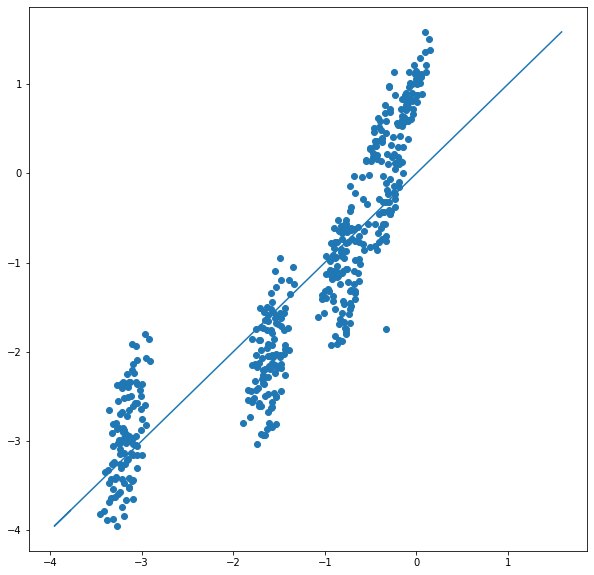

In [28]:
plt.figure(figsize=(10,10))
plt.plot(y,y)
plt.scatter(x, y)
plt.show